In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Probability

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt

In [4]:
from scipy.stats import norm

def plot_hist_dist(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    ax = ax if ax else plt.gca()
    _, bins, _ = ax.hist(rvs, bins=50, alpha=.6, normed=True, label=(label + ' rvs').strip(), color=bar_color)
    xmin, xmax = bins.min(), bins.max()
    xpoints = np.arange(xmin, xmax, (xmax - xmin) / 100)
    ax.plot(xpoints, dist.pdf(xpoints), label=(label+' pdf').strip(), color=line_color)
    if title:
        ax.set_title(title)
    ax.legend()
    
def plot_hist_dist_discrete(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    ax = ax if ax else plt.gca()
    uniques = np.unique(rvs)
    mids = (uniques[1:] + uniques[:-1]) / 2.
    bins = np.hstack([[uniques[0]-.5], mids, [uniques[-1] + .5]])
    plt.hist(rvs, bins=bins, normed=True, label=(label + ' rvs').strip(), alpha=.6, color=bar_color)
    if title:
        ax.set_title(title)
    plt.plot(uniques, dist.pmf(uniques), label=(label + ' pmf').strip(), color=line_color)
    ax.legend()
    
def print_mean_variance(rvs, dist):
    print "Mean:     Theoretical {:.4f}, Actual {:.4f}".format(dist.mean(), rvs.mean())
    print "Variance: Theoretical {:.4f}, Actual {:.4f}".format(dist.var(),  rvs.var())

## Random Variables

Probability and statistics is based on the notion of a **random variable**.  Random variables are *abstract mathematical quantities* (often denoted $X$) which can take on values at random.  Random variates (**rvs**) are instances of random variables.

**Example:** Suppose we roll a standard fair die.  The number shown on top is a random variable taking on the values 1 through 6, inclusive.

While the value of a variate can be anything, we know what values tend to be based on a **distribution**, $p(x)$, which is the probability of $X$ taking on any value $x$.  Their distributions are how we reason about randomness mathematically.

**Example:** In the previous dice example, the dice rolls are distributed evenly ($\frac{1}{6}$ probability of each event) over all six possible values.

While people (including us) often use random variable and its distribution interchangeably, these are *not* the same concept and the distinction is not semantic.

**Example:** Suppose we have two dice, one red and one blue but otherwise identical.  Their rolls would be represented by two different random variables.  These two random variables have the same distribution.

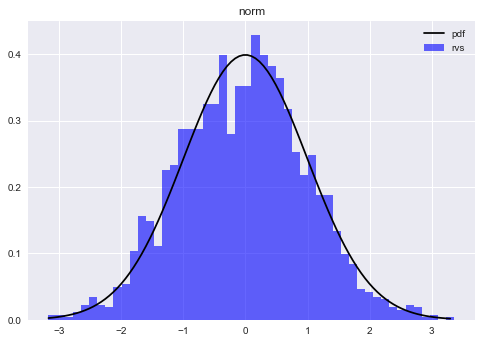

In [5]:
plot_hist_dist(norm.rvs(size=2000), norm, title=norm.name)

## Statistics of Random Variables

### Discrete Random Variables
For discrete-valued random variables, we can plot the distribution (or more precisely, the probability mass function or **pmf**, $p(x)$, which denotes the probability that $X = x$) of a random variable.  Notice that the **pmf** has the critical property that it is non-negative $(p(x) \ge 0)$ and 
$$ \sum_x p(x) = 1 \,.$$

We can compute statistics about random variables using the expectation operator $\mathbb{E}$.  These include the mean
$$ \mathbb{E}[X] = \sum x p(x) $$
and variance
$$ \mbox{Var}[X] = \mathbb{E}\left[(X-\mathbb{E}[X])^2\right] = \sum x^2 p(x) - \left( \sum x p(x) \right)^2 \,. $$
The standard deviation is simply the square root of the variance.  We may wish to calculate the probability $\mathbb{P}$ of different **events** associated with these random variables.  For example the cumulative distribution function or **cdf** of a random variable is associated with the events

$$ F_X(a) = \mathbb{P}[X \le a] = \sum_{x \le a} p(x)\,. $$

**Examples:** There are a number of important random variables.  The discrete ones include:

1. Bernoulli Distribution
1. Binomial Distribution
1. Geometric Distribution
1. Poisson Distribution

### Continuous Random Variables
So far, we have only given the formulas for discrete-valued random variables.  Continuous random variables have a probability distribution function or **pdf**, also denoted $p(x)$.  A pdf has to be non-negative ($p(x) \ge 0$) and satisfy
$$ \int_{(-\infty, \infty)} p(x) dx = 1\,. $$
You will also hear about the cumulative distribution function or **cdf** defined
$$ F_X(x) = \int_{(-\infty, x]} p(y)dy\,. $$
The probability density of $X = x$ is given by $p(x)$.  Put another way, the probability that $a < X \le b$ is given by the integral
$$ \mathbb{P}[a < X \le b] = \int_{(a, b]}p(x)dx = F_X(b) - F_X(a) \,. $$

**Examples:** The continuous ones include:

1. Beta Distribution
1. Exponential Distribution
1. Normal Distribution

**Exercise:** What would the corresponding formulas for mean and standard deviation look like for continuous-valued random variables?

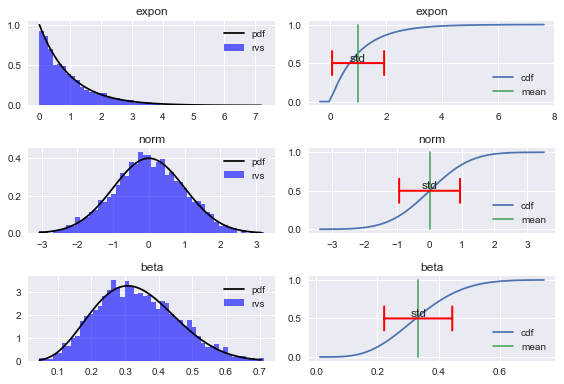

In [6]:
# Some examples of distributions

dists = (sp.stats.expon(),
         sp.stats.norm(),
         sp.stats.beta(a=5, b=10))
for k, dist in enumerate(dists):
    ax = plt.subplot(3,2,2*k+1)
    plot_hist_dist(dist.rvs(size=2000), dist, title=dist.dist.name, ax=ax)

    xs = np.linspace(*plt.xlim())
    ax = plt.subplot(3,2,2*k+2)
    ax.plot(xs, dist.cdf(xs), label='cdf')
    mean, var = dist.stats('mv')
    ax.plot([mean]*2, [0., 1.], label='mean')
    plt.text(mean, 0.5, 'std', ha='center', va='bottom')
    plt.annotate("", xy=(mean-np.sqrt(var), 0.5), xycoords='data',
                 xytext=(mean+np.sqrt(var), 0.5), textcoords='data',
                 arrowprops=dict(arrowstyle="|-|", lw=2, color='r'))    

    ax.legend(loc='lower right')
    ax.set_title(dist.dist.name)
plt.tight_layout()

## Quantile Functions

As it turns out, continuous distributions are related to one another via their quantile functions.  The **quantile function** (denoted $q_X(u)$) is the inverse of the cumulative distribution function or cdf $F_X(x)$.  That is,
$$ q_X (F_X(x)) = x \qquad F_X(q_X(u)) = u$$
Notice that since the range of $F_X$ is only $(0,1)$, then $q_X$ is a function on $(0,1)$.

**Theorem:** If $U$ is a uniform random variable then $q_X(U)$ is has the same distribution as $X$.

In [ ]:
# Quantile functions to generate random variables

N = 1000

dists = (
    sp.stats.expon(scale=1/2.),
    sp.stats.beta(a=2., b=4.),
    sp.stats.norm(loc=2., scale=4.),
    sp.stats.chi2(df=4.)
)

rvs = sp.stats.uniform().rvs(size=N)
for k, dist in enumerate(dists):
    ax = plt.subplot(2,2,k+1)
    plot_hist_dist(dist.ppf(rvs), dist, title=dist.dist.name, ax=ax)
plt.suptitle('rvs from quantile functions')
plt.tight_layout()

## Bernoulli Random Variable

The Bernoulli random variable is the simplest random variable in probability.  The value of the trial $X$ can take on either $0$ (failure) or $1$ (success) and it is parameterized by the value $p$, which is the probability that it is a success.  The pmf is given by

$$ p(x) = \left\{ \begin{align} p && \mbox{if }x=1 \\ 1-p && \mbox{if }x = 0 \end{align} \right. \,.$$

**Examples:**
- We can think of $p$ as the probability a (biased) coin lands on heads after a flip.
- Whether a user clicks on a displayed advertisement.
- Whether a borrower defaults on a loan.

**Stats:**
- The mean is $\mathbb{E}[X] = p$
- The variance is $\mbox{Var}[X] = p(1-p)$.

In [ ]:
# Mean and variance of the Bernoulli

p = .4

dist = sp.stats.bernoulli(p)
rvs = dist.rvs(size=1000)
print_mean_variance(rvs, dist)

## Independence and Conditional Expectation

Two random variables are independent if knowing the results of one does not tell you anything about the other.  That is, if $p_{X, Y}(x,y)$ is the joint pmf or pdf for $(X,Y)$ and $p_X(x)$ and $p_Y(y)$ are the pmf or pdf for $X$ and $Y$, then a variable is independent if and only if

$$ p_{X, Y}(x,y) = p_X(x)p_Y(y)\,. $$

The **covariance** of two random variables $X$ and $Y$ is given by

$$ \begin{split} \mbox{Cov}[X,Y] &= \mathbb{E}\left[(X - \mathbb{E}[X]) (Y - \mathbb{E}[Y])\right] \\
&= \mathbb{E}[XY] - \mathbb{E}\left[X \,\mathbb{E}[Y]\right] - \mathbb{E}\left[Y \,\mathbb{E}[X]\right] + \mathbb{E}[X]\mathbb{E}[Y] \\
&= \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \end{split} $$

If two variables are independent, their *covariance* is zero, or equivalently the expectation of the product is just the product of their expectations
$$ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] \,.$$

**Warning:** Just because two variables have zero covariance does not mean they are independent!  For example, if $X$ is a random variable taking on the values $\{-1, 0, 1\}$ with equal probability and $Y = X^2$, then they have zero covariance but are not independent.

When speaking of the joint distribution of random variables, it is often useful to speak of the **conditional expectation** given by
$$ \mathbb{E}[X \mid Y=y] = \sum_{x} x \frac{p_{X, Y}(x,y)}{p_Y(y)}\,. $$
It's useful to think of the above conditional expectation as a function of $y$.  We may also want to take the **conditional probability** of events related to $X$,
$$ \mathbb{P}[X \le a \mid Y=y] = \sum_{x \le a} \frac{p_{X, Y}(x,y)}{p_Y(y)}\,. $$

**Theorem:** If you have two independent random variables, $X$ and $Y$, the means add
$$ \mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y] $$
and variances add
$$ \mbox{Var}[X + Y] = \mbox{Var}[X] + \mbox{Var}[Y]\,. $$

**Exercise:** What is the standard deviation of $X + Y$?  What happens if you add $n$ independent and identically distributed random variables?

In [ ]:
# Independent and dependent Bernoulli random variables

p = .6
q = .9
r = p / (1-p) * (1-q)
N = 2500

# independent random variables
rvs_x1 = sp.stats.bernoulli(p).rvs(size=N)
rvs_y1 = sp.stats.bernoulli(p).rvs(size=N)

# dependent random variables
rvs_x2 = sp.stats.bernoulli(p).rvs(size=N)
rvs_y2 = sp.stats.bernoulli(np.where(rvs_x2, q, r)).rvs(size=N)

cov1 = np.cov(rvs_x1, rvs_y1)
cov2 = np.cov(rvs_x2, rvs_y2)

vmin = min(cov1.min(), cov2.min())
vmax = min(cov1.max(), cov2.max())

plt.subplot(2, 2, 1)
plt.matshow(cov1, fignum=False, vmin=vmin, vmax=vmax, cmap=plt.cm.Blues)
plt.grid(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('independent cov', y=1.15)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.matshow(cov2, fignum=False, vmin=vmin, vmax=vmax, cmap=plt.cm.Blues)
plt.grid(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependent cov', y=1.15)
plt.colorbar()

plt.subplot(2, 2, 3)
pd.Series({
    'X=0': rvs_y1[rvs_x1==0].mean(),
    'X=1': rvs_y1[rvs_x1==1].mean(),
    'X=*': rvs_y1.mean(),
}).plot(kind='bar', title='conditional mean (independent)')
plt.ylim([0., 1.])

plt.subplot(2, 2, 4)
pd.Series({
    'X=0': rvs_y2[rvs_x2==0].mean(),
    'X=1': rvs_y2[rvs_x2==1].mean(),
    'X=*': rvs_y2.mean(),
}).plot(kind='bar', title='conditional mean (dependent)')
plt.ylim([0., 1.])

plt.tight_layout();

## Binomial Random Variable

The Binomial random variable is just the sum of $n$ independent Bernoulli random trials each with an independent probability $p$ of success.  Its pmf is given by the binomial theorem:

$$ p(k) = \binom{n}{k} p^k(1-p)^{n-k}\,. $$

**Examples:**
- The total number of times a biased coin lands on heads after being flipped $n$ times.
- The total number of ad clicks after seeing $n$ ads if a user has an independent probability $p$ of clicking on an advertisement.
- The number of points scored after $n$ free-throw attempts if each attempt has $p$ probability of succeeding is binomial.

**Stats:**
- The mean is $\mathbb{E}[X] = np$
- The variance is $\mbox{Var}[X] = np(1-p)$.

Notice that the mean increases with both $n$ and $p$ but that the variance decreases with $p$ for a fixed mean: $\mbox{Var}[X] = \mathbb{E}[X] \cdot (1-p)$.  This is illustrated in the plots below.

In [ ]:
# Mean and variance of the Binomial

N = 1000

dists = ((sp.stats.binom(40, .2), 'blue'),
         (sp.stats.binom(10, .8), 'green'),
         (sp.stats.binom(10, .4), 'red'))

for dist, color in dists:
    plot_hist_dist_discrete(dist.rvs(size=N), dist, label="Binom(n={}, p={})".format(*dist.args), line_color=color, bar_color=color)
plt.legend(loc='upper left')

**Theorem:** The sum of $n$ independent Bernoulli trials with probability $p$ of success is a Binomial with parameters $n$ and $p$.

**Exercise:** Prove the formulas for mean and variance using the fact that the Binomial is the sum. 

In [ ]:
# Binomial is the sum of Bernoulli

p = .4
n = 6

rvs = sp.stats.bernoulli(p).rvs(size=[n, 1000]).sum(axis=0)
dist=sp.stats.binom(n, p)

plot_hist_dist_discrete(rvs, dist, title="Binomial")

## Geometric Distribution

The geometric distribution models the number $X$ of independent Bernoulli trials needed to obtain a success -- that is, we keep testing independent Bernoulli random variables until we are successful and measure the (random) number of such trials.  We will call this $G(p)$.  The pmf is given by

$$ p(k) = (1-p)^{k-1}p \,. $$

**Examples:**
- Suppose a chef needs to crack an egg without breaking a yolk.  If she doesn't break yolks with probability $p$,  then $G(p)$ is the distribution of the number of eggs it takes.
- A newly-wed couple plans to have children until they have a girl.  The total number of children they expect to have when they have their first girl is roughly $G\left(\frac{1}{2}\right)$.
- A person being treated for cancer is given chemotherapy drugs which have independent and identically distributed probability $p$ of successful treatment.  The number of drugs he must take until he is successfully treated is $G(p)$.

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{1}{p}$
- The variance is $\mbox{Var}[X] = \frac{1-p}{p^2}$.

In [ ]:
# The Geometric distribution is the number of Bernoulli trials
# before a successful trial

p = .8

def geom(p):
    dist = sp.stats.bernoulli(p)
    k = 1.
    while not dist.rvs():
        k += 1
    return k

rvs = np.zeros(shape=100)
for k in xrange(len(rvs)):
    rvs[k] = geom(p)

dist = sp.stats.geom(p)
plot_hist_dist_discrete(rvs, dist, title="Geometric Distribution")

As $p$, the probability of success for any given trial, increases, we would expect the first success to occur early and the mean of the geometric random variable to be lower.  This is born out in the plots below.

In [ ]:
# Geometric Random Variables

N = 1000

dists = ((sp.stats.geom(.2), 'blue'),
         (sp.stats.geom(.4), 'green'),
         (sp.stats.geom(.8), 'red'))

for dist, color in dists:
    plot_hist_dist_discrete(dist.rvs(size=N), dist, label="Geometric(p={})".format(*dist.args), line_color=color, bar_color=color)

## Memoryless Property

The Geometric distribution has something called a memoryless property.  Suppose your first successful Bernoulli trial is distributed $G(p)$.  Because the draws of the Bernoulli trials are independent, if you have $n$ failed trials, the distribution of *remaining* trials is still $G(p)$.  That is, the process forgets its history.

**Examples:** After breaking $n$ eggs, the distribution of the number of eggs our chef must still crack is the same as when she started.

Mathematically, we observe that if $X$ is distributed as $G(p)$,
$$ P[X=(n+k) \mid X \ge n] = (1-p)^{k-1}p = P[X=k] $$

**Exercise:** Use the definition of conditional probability to prove the above statement.

In [ ]:
# The memoryless property of the geometric distribution

p = .4
n = 5
N = 2000

dist = sp.stats.geom(p)
rvs = dist.rvs(size=N)
plot_hist_dist_discrete(rvs[rvs > n] - n, dist, title="Conditional Geometric")

## Beta Distribution

The Beta distribution is a distribution on $[0,1]$ that is very closely rated to the binomial distribution.  It has a pdf given by

$$ p(x) = \frac{x^{\alpha-1} (1-x)^{\beta - 1}}{\mbox{B}(\alpha, \beta)} $$

where $\mbox{B}(\alpha, \beta)$ is the beta function, which is just used as a normalizing constant to make $p(x)$ a probability distribution.  We'll denote this distribution $B(\alpha, \beta)$.

**Examples:**
- If $\alpha = 1$ and $\beta = 1$, this is just the uniform distribution.

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$
- The variance is $\mbox{Var}[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$.

In [ ]:
# Some examples of the beta distribution

dists = (
    (sp.stats.beta(a=1, b=1), 'blue'),
    (sp.stats.beta(a=4, b=2), 'green'),
    (sp.stats.beta(a=4, b=8), 'red'))

for dist, color in dists:
    plot_hist_dist(dist.rvs(size=2000), dist, label="Beta(a={a}, b={b})".format(**dist.kwds), line_color=color, bar_color=color)

## Bayes' Theorem

Bayes' Theorem is a simple rule about conditional probabilities that has profound consequences.

$$ \mathbb{P}[X=x \mid Y=y] = \frac{\mathbb{P}[Y=y \mid X=x] \cdot \mathbb{P}[X=x]}{\mathbb{P}[Y=y]} $$

Mathematically, it's simply derived from the fact that
$$ \mathbb{P}[X=x\mid Y=y] \cdot \mathbb{P}[Y=y] = \mathbb{P}[X=x, Y=y] = \mathbb{P}[Y=y \mid X=x] \cdot \mathbb{P}[X=x] \,.$$

While it seems trivial, it tells us what we know about one variable ($X$) given information about another ($Y$). 

**Example:** Assume we have  biased Bernoulli $X$ that takes on $1$ with probability $P$.  We don't know $P$; we can call that a random variable as well, and let's assume it's beta distributed with parameters $\alpha$ and $\beta$ (denoted $B(\alpha, \beta)$).  By observing flips of $X$, we can intuitively infer the value of $P$.

Using Bayes' Theorem, we have that the new distribution of
$$ 
\begin{align}
\mathbb{P}[P=p \mid X=1] \propto\,\, & \mathbb{P}[X=1 \mid P=p] \cdot \mathbb{P}[P=p] \\
 \propto\,\, & p p^{\alpha-1} (1-p)^{\beta-1} \\
 \propto\,\, & p^{\alpha} (1-p)^{\beta-1}
\end{align}
$$
It's not hard to show that
$$ \mathbb{P}[P=p \mid X=1] = B(\alpha+1, \beta)\,. $$
Similarly, 
$$ \mathbb{P}[P=p \mid X=0] = B(\alpha, \beta+1)\,. $$

Stated differently, if we have $P$ distributed as $B(\alpha, \beta)$ (the **prior**), and if we observe $X=1$, we update our estimate of the distribution of $P$ (the **posterior**) to $B(\alpha+1, \beta)$, and if we observe $X=0$, we update the posterior to $B(\alpha, \beta+1)$.  The fact that the Bayes' Theorem equations can be solved in closed form makes the Bernoulli and Beta distributions **Conjugate Priors**.

**Example:** We serve ads to individuals, and our prior belief that they will click on an ad is $P$ distributed $B(\alpha, \beta)$.  If we see them click on the ad, then our posterior for $P$ is $B(\alpha+1, \beta)$, and if they do not, then our posterior is $B(\alpha, \beta+1)$.

Continuing on, if we show another ad to the same individual, we can get this process to update again.  So if they click on 2 of the 10 ads we show them, then our posterior $P$ is $B(\alpha+2, \beta+8)$.

In fact, the canonical interpretation of $B(\alpha, \beta)$ is our belief about the odds of some $X$ being successful if we have seen $\alpha$ 1s and $\beta$ 0s.

Below is Bayes' Theorem in action:

In [ ]:
# Beta and binomial are conjugate priors

def binomial_bayes(a_0, b_0, a_1, b_1):
    prior = sp.stats.beta(a=a_0, b=b_0)
    posterior = sp.stats.beta(a=a_0+a_1, b=b_0+b_1)

    prior_rvs = prior.rvs(size=10000)
    variates = sp.stats.binom(n=a_1+b_1, p=prior_rvs).rvs()
    posterior_rvs = prior_rvs[variates == a_1]

    ax1 = plt.subplot(2,1,1)
    plot_hist_dist(prior_rvs, prior, title="Prior Beta(a={a}, b={b})".format(**prior.kwds), ax=ax1)
    ax2 = plt.subplot(2,1,2, sharex=ax1)
    plot_hist_dist(posterior_rvs, posterior, title="Posterior Beta(a={a}, b={b})".format(**posterior.kwds), ax=ax2)
    
    plt.tight_layout()
    
binomial_bayes(a_0=2, b_0=2, a_1=6, b_1=3)

Continuing with the previous example,  we expect these three facts to be true intuitively:
- If $X=1$, we expect our estimate of $P$ to go up.
- If $X=0$, we expect our estimate of $P$ to go down.
- In either case, we expect that we have learned more information about $P$ and we expect the uncertainty of $P$ to decrease.

We can see these 3 facts in the plots of $\beta$ below:

In [ ]:
# Intuition of beta distribution in terms of the Bernoulli

dists = (
    sp.stats.beta(a=2, b=2),
    sp.stats.beta(a=2, b=6),
    sp.stats.beta(a=6, b=2),
    sp.stats.beta(a=6, b=6),
)

N=2000
M=100

plt.figure()
for k, dist in enumerate(dists):
    ax = plt.subplot(2,2,k+1)
    plot_hist_dist(
        dist.rvs(size=N),
        dist,
        title="B(a={a},b={b})".format(**dist.kwds),
        ax=ax
    )
    ax.set_xlim([0, 1])
plt.suptitle('Distributions')
plt.tight_layout()

## Exponential Distribution

The exponential distribution is a non-negative continuous random variable whose pdf is shaped exponentially

$$ p(x) = \lambda e^{-\lambda x} $$

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{1}{\lambda}$
- The variance is $\mbox{Var}[X] = \frac{1}{\lambda^2}$.

In [ ]:
# Exponential Random Variables

N = 1000

dists = ((sp.stats.expon(scale=1./.5), 'blue'),
         (sp.stats.expon(scale=1./1.), 'green'),
         (sp.stats.expon(scale=1/2.), 'red'))

for dist, color in dists:
    plot_hist_dist(dist.rvs(size=N), dist, label="Exponential($\\lambda$={scale})".format(**dist.kwds), line_color=color, bar_color=color)
plt.xlim([0, 6]);

We can think of it as the continuous analog of the geometric distribution.  Its pdf is similar to the pmf of the geometric distribution and it also has a memoryless property:

$$ \mathbb{P}[X=x+k \mid X \ge k]= \lambda e^{-\lambda x} = \mathbb{P}[X=x]$$

In [ ]:
# The memoryless property of the exponential distribution

lam=.2
a = 3.2
N = 2000

dist = sp.stats.expon(scale=1./lam)
rvs = dist.rvs(size=N)
plot_hist_dist(rvs[rvs >= a] - a, dist, title="Conditional Exponential")

## Normal Distribution

Probably the most famous distribution in all of statistics is the normal (or Gaussian) distribution.  It is parameterized by its mean $\mu$ and standard deviation $\sigma$, and the distribution is denoted $N(\mu, \sigma^2)$.  Its pdf is given by

$$ p(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(\frac{(x - \mu)^2}{2 \sigma^2} \right) \,.$$

**Stats:**
- The mean is $\mathbb{E}[X] = \mu$
- The variance is $\mbox{Var}[X] = \sigma^2$.

**Examples:**
- The height or weight of students in a classroom.
- The distribution of test scores on the SAT.

**Useful Facts:** Let's write $n(x  \mid  \mu, \sigma^2)$ to be the normal pdf with mean $\mu$ and standard deviation $\sigma$.  A little bit of algebra shows that the distribution satisfies translational symmetry,

$$ n(x  \mid  \mu, \sigma^2) = n(x - \mu  \mid  0, \sigma^2) $$

and scaling symmetry

$$ n(x  \mid  \mu, \sigma^2) = n\left(\frac{x - \mu}{\sigma} \,\Big|\, 0, 1\right)\,. $$

A standard normal distribution is one with mean $\mu = 0$ and standard deviation $\sigma = 1$.

In [ ]:
## Some Normal Distributions
    
dists = ((sp.stats.norm(loc=0., scale=1.), 'blue'),
         (sp.stats.norm(loc=3., scale=1.), 'green'),
         (sp.stats.norm(loc=-3., scale=2.), 'red'),
         (sp.stats.norm(loc=-3., scale=.5), 'purple'))

for dist, color in dists:
    plot_hist_dist(dist.rvs(size=2000),
                   dist,
                   label="N($\\mu$={loc}, $\\sigma$={scale})".format(**dist.kwds),
                   line_color=color,
                   bar_color=color)
    plt.title('Some Normal Distributions')

## Central Limit Distribution

Often, when we look at random variables, we want to understand their mean.  It turns out this behaves in a vary predictable way.  As $n \to \infty$,

$$ \sum_{k=1}^n \frac{X_k}{n} \longrightarrow \mathbb{E}[X] \,.$$

To be more precise, as $n \to \infty$, we have that the mean becomes a random variable that's distributed normally,
$$ \sum_{k=1}^n \frac{X_k}{n} \sim N\left(\mathbb{E}[X], \frac{\mbox{Var}[X]}{n} \right) .$$

Let's see that in action.  We'll plot very different distributions:

In [ ]:
# A variety of distributions, when averaged, are normal

dists = (
    sp.stats.uniform(),
    sp.stats.beta(a=2., b=4.),
    sp.stats.expon(),
    sp.stats.chi2(df=10),
    sp.stats.gamma(a=1.99),
    sp.stats.norm(),
)

N=2000
M=100

plt.figure(figsize=(8, 11))
for k, dist in enumerate(dists):
    ax = plt.subplot(6,2,2*k+1)
    plot_hist_dist(dist.rvs(size=N), dist, title=dist.dist.name + ' (original)', ax=ax)
    
    ax = plt.subplot(6,2,2*k+2)
    m, v = dist.stats()
    rvs = dist.rvs(size=(N,M)).mean(axis=1)
    plot_hist_dist(rvs, sp.stats.norm(loc=m, scale=np.sqrt(v / M)), 
                   title=dist.dist.name + ' (central limit)', ax=ax)

plt.tight_layout()

## Poisson Distribution

The Poisson Distribution is a discrete-valued distribution representing the counts of independent events occurring within a fixed interval.  The Poisson distribution makes a few key assumptions:
- Independence: the occurrence of any single event does not affect the likelihood of another
- The events have the same likelihood of occurring on average
- The probability of an event occurring is proportional to the length of the interval

The distribution is parameterized by $\lambda$, its intensity, and has a pmf

$$ p(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

**Stats:**
- The mean is $\mathbb{E}[X] = \lambda$
- The variance is $\mbox{Var}[X] = \lambda$.

**Examples:**
- The number of goals scored in a World Cup match.
- The number of patient arrivals to an emergency room in one day.
- The number of asteroids hitting the earth each year.
- The number of Prussian Cavalry Officers kicked by their horse each year.

The Poisson distribution and the exponential distribution are closely related.

In [ ]:
# Poisson Random Variables

N = 1000

dists = ((sp.stats.poisson(mu=2.), 'blue'),  # "lambda" in scipy is named "mu"
         (sp.stats.poisson(mu=4.), 'green'),
         (sp.stats.poisson(mu=8.), 'red'))

for dist, color in dists:
    plot_hist_dist_discrete(dist.rvs(size=N), dist, label="Poisson($\\lambda$={mu})".format(**dist.kwds), line_color=color, bar_color=color)
plt.xlim([0,20]);

## Relationship between Exponential and Poisson

There is a well-known relationship between the exponential and Poisson distributions.  Let's consider customer arrivals at our store.  Let's assume that each arrival is independent of the others and that the next arrival is always exponentially distributed with parameter $\lambda$.  Constructively, think about:

- As soon as the door opens in the morning, we start an exponentially distributed clock with parameter $\lambda$ and when it fires, the first customer shows up.
- As soon as a customer arrives, we start another independent exponentially distributed clock with parameter $\lambda$ and when it fires, the next customer shows up.

This is called an **arrival process**.  Then the number of arrivals in a fixed period of time (e.g. a day) will be Poisson-distributed with parameter $\lambda$.

In [ ]:
# Poisson distribution as waiting times
lam = 3.5
T = 3.
N = 1000
M = 100

exp_rvs = sp.stats.expon(scale=1./lam).rvs(size=[N, M])
waiting_times_rvs = np.cumsum(exp_rvs, axis=1)
poisson_rvs = (waiting_times_rvs <= T).sum(axis=1)
plt.figure()
plot_hist_dist_discrete(poisson_rvs, sp.stats.poisson(mu=lam * T), title="Poisson 1")

poisson_rvs = np.bincount(np.floor(np.cumsum(exp_rvs) / T).astype(int))
plt.figure()
plot_hist_dist_discrete(poisson_rvs, sp.stats.poisson(mu=lam * T), title="Poisson 2")

*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*